<a href="https://colab.research.google.com/github/okay-ok/CNN4U/blob/main/First_Rough_Commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

Loading Dataset


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="40Inr7ABVxm8NRLjfQxu")
project = rf.workspace("shanthan-3voxa").project("currency-detection-yxetv")
dataset = project.version(1).download("folder")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=f14d4fa76b23ed53974a6a848122774fbf72c566ed5813b2f73987933c055838
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to currency-detection-1 in folder:: 100%|██████████| 469/469 [00:00<00:00, 1176.29it/s]


Building The CNN with 2 Convolutional+Pooling Layers and 2 dense layers

In [ ]:
cnn = models.Sequential([
   
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(640, 640, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size = 1, activation = 'relu'),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size = 1, activation = 'relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=80, kernel_size = 1, activation = 'relu'),
    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=16, kernel_size = 1, activation = 'relu'),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

Compiling the model

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 319, 319, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 319, 319, 32)      544       
                                                                 
 conv2d_2 (Conv2D)           (None, 317, 317, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 158, 158, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 158, 158, 64)      2

Manupulating the data


In [ ]:
classes = {0:'10', 1:'20', 2:'50', 3:'100', 4:'200', 5:'500', 6:'2000'}
x_train = []
y_train = []
path = [f"/content/currency-detection-1/train/{classes[i]}/" for i in range(7)]
#print(os.listdir(path[0]))
for i in range(7):
  for j in os.listdir(path[i]):
    x_train.append(cv2.imread(path[i]+j))
    y_train.append(i)
print(len(x_train))
print(len(y_train))
x_train=np.array(x_train)
y_train=np.array(y_train)

305
305


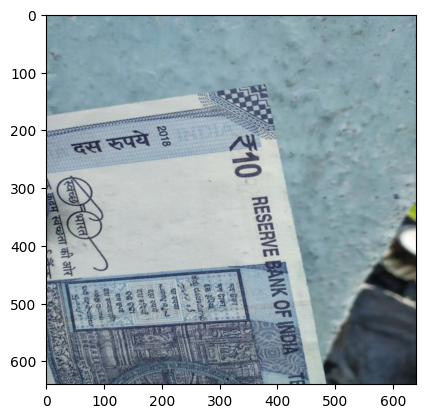

0


In [ ]:
plt.imshow(x_train[7])
plt.show()
print(y_train[7])

In [ ]:
from sklearn.utils import shuffle
x_train, y_train=shuffle(x_train,y_train)

In [ ]:
x_train=x_train/255.0

In [ ]:
x_train.shape

(305, 640, 640, 3)

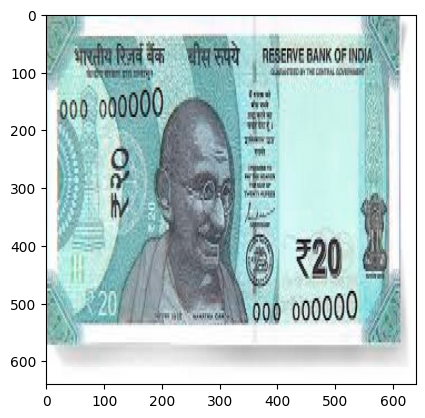

1


In [ ]:
plt.imshow(x_train[7])
plt.show()
print(y_train[7])

In [ ]:
x_test = []
y_test = []
path = [f"/content/currency-detection-1/test/{classes[i]}/" for i in range(7)]
#print(os.listdir(path[0]))
for i in range(7):
  for j in os.listdir(path[i]):
    x_test.append(cv2.imread(path[i]+j))
    y_test.append(i)
print(len(x_test))
print(len(y_test))
x_test=np.array(x_test)
y_test=np.array(y_test)

x_test=x_test/255.0

39
39


Training on dataset for 10 epochs

In [ ]:
x_val = []
y_val = []
path = [f"/content/currency-detection-1/valid/{classes[i]}/" for i in range(7)]
#print(os.listdir(path[0]))
for i in range(7):
  for j in os.listdir(path[i]):
    x_val.append(cv2.imread(path[i]+j))
    y_val.append(i)
print(len(x_val))
print(len(y_val))
x_val=np.array(x_val)
y_val=np.array(y_val)

x_val=x_val/255.0

85
85


In [ ]:
cnn.fit(x_train, y_train, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
10/10 [==============================] - 36s 1s/step - loss: 1.9692 - accuracy: 0.1934 - val_loss: 1.9295 - val_accuracy: 0.1765
Epoch 2/50
10/10 [==============================] - 3s 347ms/step - loss: 1.9051 - accuracy: 0.2131 - val_loss: 1.9041 - val_accuracy: 0.1765
Epoch 3/50
10/10 [==============================] - 4s 390ms/step - loss: 1.8468 - accuracy: 0.2328 - val_loss: 1.7783 - val_accuracy: 0.2941
Epoch 4/50
10/10 [==============================] - 4s 369ms/step - loss: 1.7581 - accuracy: 0.2656 - val_loss: 1.7935 - val_accuracy: 0.2941
Epoch 5/50
10/10 [==============================] - 3s 347ms/step - loss: 1.5666 - accuracy: 0.4230 - val_loss: 1.6121 - val_accuracy: 0.3412
Epoch 6/50
10/10 [==============================] - 4s 364ms/step - loss: 1.3650 - accuracy: 0.4656 - val_loss: 1.5889 - val_accuracy: 0.3294
Epoch 7/50
10/10 [==============================] - 4s 395ms/step - loss: 1.2719 - accuracy: 0.5082 - val_loss: 1.4983 - val_accuracy: 0.4824
Epoch 8/

KeyboardInterrupt: ignored

In [ ]:
cnn.evaluate(x_test,y_test,verbose=1)

In [ ]:
cnn.save('small1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

# Save the model.
with open('small1.tflite', 'wb') as f:
  f.write(tflite_model)